<a href="https://colab.research.google.com/github/natbcar/MachineLearning/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 

In [2]:
# Transform to convert images to a tensor and then normalize pixel values to range [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Loading in the CIFAR10 datasets
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [22]:
# Create the data loaders for test and training data 
train_loader = DataLoader(training_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=True)

In [23]:
label_dict = {
    0 : "airplane",
    1 : "automobile", 
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

In [24]:
def show_img(img, label, fig):
  """ Displays a 3 channel RGB image
  """
  img = img / 2 + 0.5 # unnormalize the image sinc we normalized when importing data
  img = img.numpy() # cast tensor into numpy array
  img = np.transpose(img, (1, 2, 0)) # permute the channels so array goes from (3, 32, 32) ---> (32, 32, 3)

  # display the image
  fig.add_subplot(rows, cols, i) 
  plt.imshow(img)
  plt.title(label_dict[label])
  plt.axis("off")

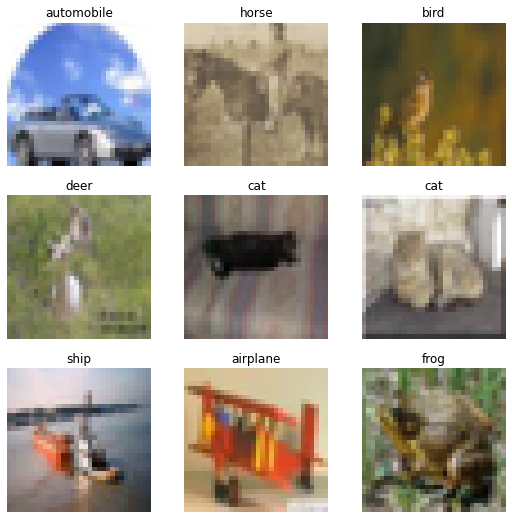

In [25]:
# Lets display some images from the CIFAR-10 dataset
fig = plt.figure(figsize=(9,9))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  rand_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[rand_idx]
  show_img(img, label, fig)

plt.show()

In [26]:
"""
Checking the dimensions of our network to make sure they all line up
When generating a random tensor pytorch expects 4 dimensions an extra for
the number of examples in the batch
"""

x = torch.rand(size=(64, 3, 32, 32))
net = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Conv2d(64, 192, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Conv2d(192, 384, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Flatten(),
      nn.Linear(in_features=256*2*2, out_features=4096),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(in_features=4096, out_features=4096),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(4096, 10)
      )
for layer in net:
    x = layer(x)
    print(layer.__class__.__name__, 'output shape:\t', x.shape)

Conv2d output shape:	 torch.Size([64, 64, 16, 16])
ReLU output shape:	 torch.Size([64, 64, 16, 16])
MaxPool2d output shape:	 torch.Size([64, 64, 8, 8])
Conv2d output shape:	 torch.Size([64, 192, 8, 8])
ReLU output shape:	 torch.Size([64, 192, 8, 8])
MaxPool2d output shape:	 torch.Size([64, 192, 4, 4])
Conv2d output shape:	 torch.Size([64, 384, 4, 4])
ReLU output shape:	 torch.Size([64, 384, 4, 4])
Conv2d output shape:	 torch.Size([64, 256, 4, 4])
ReLU output shape:	 torch.Size([64, 256, 4, 4])
Conv2d output shape:	 torch.Size([64, 256, 4, 4])
ReLU output shape:	 torch.Size([64, 256, 4, 4])
MaxPool2d output shape:	 torch.Size([64, 256, 2, 2])
Flatten output shape:	 torch.Size([64, 1024])
Linear output shape:	 torch.Size([64, 4096])
ReLU output shape:	 torch.Size([64, 4096])
Dropout output shape:	 torch.Size([64, 4096])
Linear output shape:	 torch.Size([64, 4096])
ReLU output shape:	 torch.Size([64, 4096])
Dropout output shape:	 torch.Size([64, 4096])
Linear output shape:	 torch.Size([64

In [27]:
class AlexNet(nn.Module):
  """ Architecture inspired by AlexNet. Since I am not using the same dataset the 
  dimensions are a adjusted to fit the CIFAR-10 dataset. AlexNet was trained on 
  ImageNet which has images with dimensions 3x224x224. ImageNet is too big and I
  didn't want to download it so I opted for CIFAR-10. I adjusted the kernel sizes
  so that they would be able to detect features on these smaller images. There are
  the same number of convolutional, max pooling, and fully connected layers in my
  model as are in AlexNet. I was mostly just playing around trying to understand
  CNNs and this important paper in the rise of deep learning.
  """
  def __init__(self):
    super(AlexNet, self).__init__()
    self.net = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Conv2d(64, 192, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Conv2d(192, 384, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.Conv2d(384, 256, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.Conv2d(256, 256, kernel_size=3, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Flatten(),
      nn.Linear(in_features=256*2*2, out_features=4096),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(in_features=4096, out_features=4096),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(4096, 10)
      )
    
  def forward(self, x):
    logits = self.net(x)
    return logits

In [28]:
# Switching to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Our device is {}".format(device))

Our device is cuda


In [29]:
# Initializing hyper params
learning_rate = 1e-3
batch_size = 128
num_epochs = 10

In [30]:
# Initializing model, objective, optim
model = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
# Track training loss, validation loss, accuracy
training_loss = []
validation_loss = []
accuracy = []

In [32]:
for epoch in range(num_epochs):

  # --- Train Model ---
  for i, (X, y) in enumerate(train_loader):

    size = len(train_loader.dataset)

    # --- Compute the prediction and loss ---
    pred = model(X)
    loss = criterion(pred, y)

    # --- Backpropigation ---
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_loss.append(loss.item())

    if i % 100 == 0:
      loss, current = loss.item(), i * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

  # --- Validate Model ---
  with torch.no_grad():
    size = len(test_loader.dataset)
    avg_loss, avg_acc = 0, 0
    for X, y in test_loader:
      pred = model(X)
      avg_loss += criterion(pred, y)
      avg_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss /= size
    avg_acc /= size

    validation_loss.append(avg_loss)
    accuracy.append(avg_acc)

    print(f"Test Error: \n Accuracy: {(100*avg_acc):>0.1f}%, Avg loss: {avg_loss:>8f} \n")

loss: 2.301116  [    0/50000]
loss: 1.739887  [12800/50000]
loss: 1.541216  [25600/50000]
loss: 1.450495  [38400/50000]
Test Error: 
 Accuracy: 50.5%, Avg loss: 0.010785 

loss: 1.227066  [    0/50000]
loss: 1.159503  [12800/50000]
loss: 1.356567  [25600/50000]
loss: 1.131483  [38400/50000]
Test Error: 
 Accuracy: 55.4%, Avg loss: 0.009987 

loss: 1.046800  [    0/50000]
loss: 1.158549  [12800/50000]
loss: 0.784292  [25600/50000]
loss: 0.915414  [38400/50000]
Test Error: 
 Accuracy: 64.5%, Avg loss: 0.008181 

loss: 0.930641  [    0/50000]
loss: 0.819792  [12800/50000]
loss: 0.898989  [25600/50000]
loss: 0.804299  [38400/50000]
Test Error: 
 Accuracy: 68.0%, Avg loss: 0.007385 

loss: 0.763456  [    0/50000]
loss: 0.688881  [12800/50000]
loss: 0.614389  [25600/50000]
loss: 0.883332  [38400/50000]
Test Error: 
 Accuracy: 69.6%, Avg loss: 0.006992 

loss: 0.631103  [    0/50000]
loss: 0.654461  [12800/50000]
loss: 0.458413  [25600/50000]
loss: 0.668734  [38400/50000]
Test Error: 
 Accura

At first I couldn't get the model to converge, but after increasing the batch size from 64 to 128 and switching the optimizer from torch.optim.SGD to Adam we got alright results. 

In [33]:
num_correct = 0
for i in range(len(test_data)):
  X, y = test_data[i]
  X = X.view(-1, 3, 32, 32)
  pred = model(X)
  num_correct += (pred.argmax(1) == y)

print("accuracy: {}".format((num_correct / len(test_data)).item()))

accuracy: 0.7139999866485596


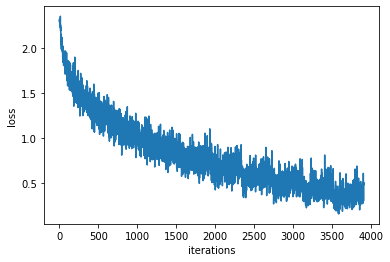

In [42]:
# Training loss
plt.plot([i for i in range(len(training_loss))], training_loss, label="training loss")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

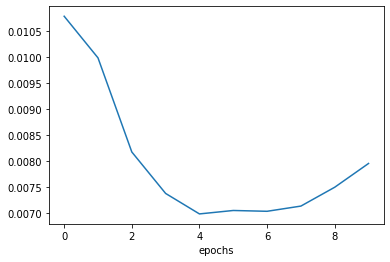

In [39]:
# Validation loss
plt.plot([i for i in range(len(validation_loss))], validation_loss, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

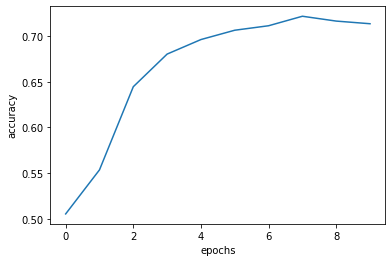

In [41]:
# Accuracy
plt.plot([i for i in range(len(accuracy))], accuracy, label="accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()